**Import Libraries**

In [2]:
import json
import requests # for making HTTPS requests in python
import pandas as pd # data manipulation lib.
from datetime import datetime 
import matplotlib.pyplot as plt #Data Visulization
import seaborn as sns # data vis

In [3]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ All libraries imported successfully!
Testing basic functionality...
JSON test passed: {"status": "ok"}
Requests test passed with status code: 200
Pandas DataFrame created:
    x  y
0  1  3
1  2  4
Datetime test passed: 2025-06-24 07:03:21.373739


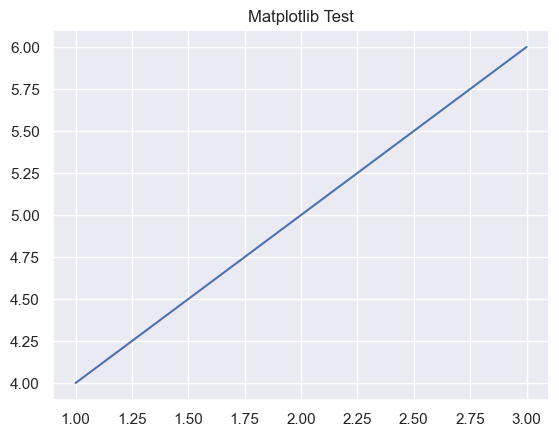

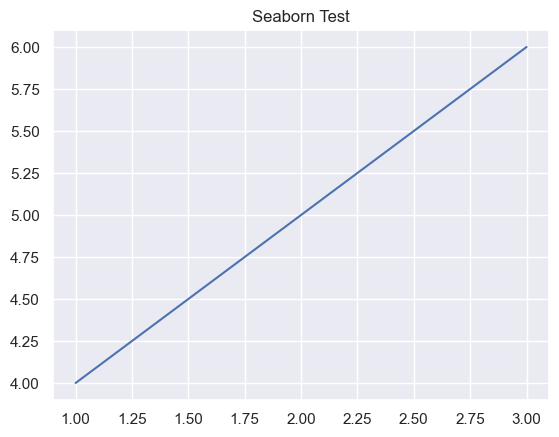

In [6]:
try:
    import json
    import requests
    import pandas as pd
    from datetime import datetime
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    print("✅ All libraries imported successfully!")

    # Quick functional test for each
    print("Testing basic functionality...")

    # json
    test_json = json.dumps({"status": "ok"})
    print("JSON test passed:", test_json)

    # requests
    response = requests.get("https://httpbin.org/get")
    print("Requests test passed with status code:", response.status_code)

    # pandas
    df = pd.DataFrame({'x': [1, 2], 'y': [3, 4]})
    print("Pandas DataFrame created:\n", df)

    # datetime
    now = datetime.now()
    print("Datetime test passed:", now)

    # matplotlib
    plt.plot([1, 2, 3], [4, 5, 6])
    plt.title("Matplotlib Test")
    plt.show()

    # seaborn
    sns.set(style="darkgrid")
    sns.lineplot(x=[1, 2, 3], y=[4, 5, 6])
    plt.title("Seaborn Test")
    plt.show()

except ImportError as e:
    print("❌ Import failed:", e)
except Exception as e:
    print("⚠️ Some test failed:", e)


In [16]:
#Get the Chennai data from the API

api_key = "b457df6b7571f6c6716abcb98e25c62f"
city = "Chennai"
url = f"http://api.openweathermap.org/data/2.5/forecast?q=Chennai&appid={api_key}&units=metric"


response = requests.get(url)


In [17]:
data = response.json()

json_str = json.dumps(data, indent= 4)
print(json_str)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1750734000,
            "main": {
                "temp": 29.13,
                "feels_like": 31.58,
                "temp_min": 29.13,
                "temp_max": 29.13,
                "pressure": 1006,
                "sea_level": 1006,
                "grnd_level": 1005,
                "humidity": 62,
                "temp_kf": 0
            },
            "weather": [
                {
                    "id": 804,
                    "main": "Clouds",
                    "description": "overcast clouds",
                    "icon": "04d"
                }
            ],
            "clouds": {
                "all": 100
            },
            "wind": {
                "speed": 8.82,
                "deg": 253,
                "gust": 11.31
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "d"
            },
         

In [18]:
#Create a function to create from Kelvin to Celsius
def kelvin_to_celsius(temp_k):
    return temp-273.15

In [26]:
import requests
import pandas as pd
from datetime import datetime, timezone

# Function to convert Kelvin to Celsius
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

# API details
api_key = "b457df6b7571f6c6716abcb98e25c62f"
city = "Chennai"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}"

# Fetch data
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    weather_data = []

    for hour in data['list']:
        date_time = datetime.fromtimestamp(hour['dt'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S')
        temp = kelvin_to_celsius(hour['main']['temp'])
        feels_like = kelvin_to_celsius(hour['main']['feels_like'])
        pressure = hour['main']['pressure']
        humidity = hour['main']['humidity']
        weather_main = hour['weather'][0]['main']
        weather_description = hour['weather'][0]['description']
        wind_speed = hour['wind']['speed']
        wind_direction = hour['wind']['deg']
        cloudiness = hour['clouds']['all']
        rain_volume = hour.get('rain', {}).get('3h', 0)
        snow_volume = hour.get('snow', {}).get('3h', 0)

        weather_data.append({
            "DateTime": date_time,
            "Temperature (°C)": round(temp, 2),
            "Feels Like (°C)": round(feels_like, 2),
            "Pressure (hPa)": pressure,
            "Humidity (%)": humidity,
            "Weather": weather_main,
            "Description": weather_description,
            "Wind Speed (m/s)": wind_speed,
            "Wind Direction (°)": wind_direction,
            "Cloudiness (%)": cloudiness,
            "Rain Volume (mm)": rain_volume,
            "Snow Volume (mm)": snow_volume
        })

    df = pd.DataFrame(weather_data)
    print(df.head())

else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


              DateTime  Temperature (°C)  Feels Like (°C)  Pressure (hPa)  \
0  2025-06-24 03:00:00             29.13            31.58            1006   
1  2025-06-24 06:00:00             30.63            33.41            1006   
2  2025-06-24 09:00:00             32.54            35.92            1005   
3  2025-06-24 12:00:00             33.68            37.07            1004   
4  2025-06-24 15:00:00             30.94            32.14            1006   

   Humidity (%) Weather      Description  Wind Speed (m/s)  \
0            62  Clouds  overcast clouds              8.82   
1            57  Clouds  overcast clouds              6.80   
2            52  Clouds  overcast clouds              8.45   
3            48  Clouds  overcast clouds              6.61   
4            48  Clouds  overcast clouds              7.14   

   Wind Direction (°)  Cloudiness (%)  Rain Volume (mm)  Snow Volume (mm)  
0                 253             100               0.0                 0  
1           

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DateTime            40 non-null     object 
 1   Temperature (°C)    40 non-null     float64
 2   Feels Like (°C)     40 non-null     float64
 3   Pressure (hPa)      40 non-null     int64  
 4   Humidity (%)        40 non-null     int64  
 5   Weather             40 non-null     object 
 6   Description         40 non-null     object 
 7   Wind Speed (m/s)    40 non-null     float64
 8   Wind Direction (°)  40 non-null     int64  
 9   Cloudiness (%)      40 non-null     int64  
 10  Rain Volume (mm)    40 non-null     float64
 11  Snow Volume (mm)    40 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 3.9+ KB
None


In [31]:
#Convert date time from object to date time
df['DateTime'] = pd.to_datetime(df['DateTime'])

#Extract day & hour 

df['Day'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour

#Pivot the data frame
df_pivot = df.pivot(index= 'Day', columns= 'Hour', values= 'Temperature (°C)')

In [32]:
average_value = df['Temperature (°C)'].mean()
print(average_value)

31.710500000000003


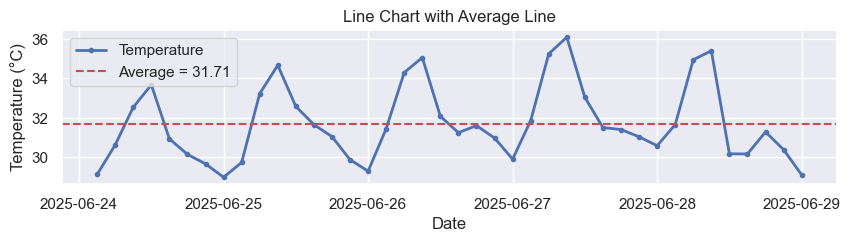

In [33]:
import matplotlib.pyplot as plt

# Calculate average temperature
average_value = df['Temperature (°C)'].mean()

# Plot line chart
plt.figure(figsize=(10, 2))
plt.plot(df['DateTime'], df['Temperature (°C)'], 
         color='b', linestyle='-', linewidth=2, marker='o', markersize=3, 
         label='Temperature')

# Add average horizontal line
plt.axhline(y=average_value, color='r', linestyle='--', 
            label=f'Average = {average_value:.2f}')

# Add chart elements
plt.title('Line Chart with Average Line')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper left')  # Show legend
plt.grid(True)
plt.show()


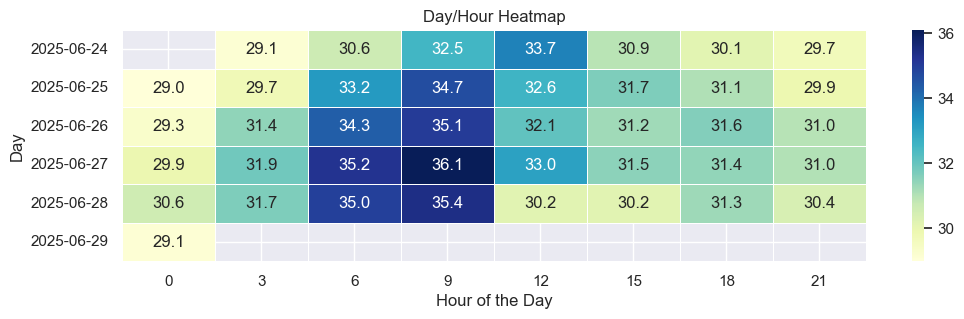

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Day/Hour Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day')
plt.show()


In [38]:
import pandas as pd #for transformation, cleaning
import psycopg2 #for connecting postgres data bases and connecting queries
from sqlalchemy import create_engine #to efficiently manage & re use connections



In [45]:
#database connections
db_username = 'postgres'
db_password = '1234'
db_host = 'localhost'
db_port = 5432
db_name = 'postgres'

In [46]:
from sqlalchemy import create_engine

# Establish a connection using SQLAlchemy engine
engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')


In [47]:
# Create a table name
table_name = 'wether_data'

# Load the data into the table
df.to_sql(table_name, engine, if_exists='replace', index=False)

# Close the engine connection
engine.dispose()

In [37]:
pip install psycopg2-binary


   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 851.2 kB/s eta 0:00:03
   -------- ------------------------------- 0.5/2.6 MB 851.2 kB/s eta 0:00:03
   ------------ --------------------------- 0.8/2.6 MB 805.8 kB/s eta 0:00:03
   -------------------- ------------------- 1.3/2.6 MB 1.1 MB/s eta 0:00:02
   ------------------------ --------------- 1.6/2.6 MB 1.2 MB/s eta 0:00:01
   -------------------------------- ------- 2.1/2.6 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
